# **음식 관련 카드 소비 + 거주인구 EDA**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = True
import seaborn as sns

import datetime

import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_rows', None)

In [2]:
food = pd.read_csv('../../../../../Source/2021 빅콘테스트/2021 빅콘테스트_ECO제주/01_제공데이터_update(210811)/04_음식관련 카드소비_CARD_SPENDING_encoded.csv')

food

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674
...,...,...,...,...,...,...,...,...
544800,2020-10-16,제주시,XXXXXXXX,알수없음,C01400,배달,5,127250
544801,2019-08-31,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,39974
544802,2020-10-03,서귀포시,XXXXXXXX,알수없음,C01400,배달,10,329832
544803,2020-10-23,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,68715


In [3]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544805 entries, 0 to 544804
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   base_date   544805 non-null  object
 1   city        544805 non-null  object
 2   emd_cd      544805 non-null  object
 3   emd_nm      544805 non-null  object
 4   mct_cat_cd  544805 non-null  object
 5   mct_cat_nm  544805 non-null  object
 6   use_cnt     544805 non-null  int64 
 7   use_amt     544805 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 33.3+ MB


In [4]:
type(food['base_date'][0])

str

In [5]:
food['base_date'] = pd.to_datetime(food['base_date'])

In [6]:
food.sort_values(by=['base_date', 'emd_nm'], inplace=True)
food.reset_index(drop=True, inplace=True)
food['year'] = food['base_date'].dt.year
food['month'] = food['base_date'].dt.month
food['day'] = food['base_date'].dt.day

food

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt,year,month,day
0,2018-01-01,제주시,50110590,건입동,C00400,간식,79,927990,2018,1,1
1,2018-01-01,제주시,50110590,건입동,C00500,패스트푸드,93,1802952,2018,1,1
2,2018-01-01,제주시,50110590,건입동,C01200,농축수산물,34,1824556,2018,1,1
3,2018-01-01,제주시,50110590,건입동,A00200,마트/슈퍼마켓,589,19891147,2018,1,1
4,2018-01-01,제주시,50110590,건입동,C00300,아시아음식,44,1836340,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...
544800,2021-06-30,서귀포시,50130550,효돈동,C01200,농축수산물,45,4366442,2021,6,30
544801,2021-06-30,서귀포시,50130550,효돈동,C00100,한식,106,2370891,2021,6,30
544802,2021-06-30,서귀포시,50130550,효돈동,C00300,아시아음식,25,596055,2021,6,30
544803,2021-06-30,서귀포시,50130550,효돈동,C00500,패스트푸드,30,507024,2021,6,30


In [7]:
# 음식점 쓰레기는 분석에서 제외 → ['마트/슈퍼마켓', '식품', '농축수산물', '배달'] 4개만 남기고 제거
food.drop(food[food['mct_cat_nm']=='한식'].index, inplace=True)
food.drop(food[food['mct_cat_nm']=='패스트푸드'].index, inplace=True)
food.drop(food[food['mct_cat_nm']=='간식'].index, inplace=True)
food.drop(food[food['mct_cat_nm']=='아시아음식'].index, inplace=True)
food.drop(food[food['mct_cat_nm']=='양식'].index, inplace=True)
food.drop(food[food['mct_cat_nm']=='주점및주류판매'].index, inplace=True)
food.drop(food[food['mct_cat_nm']=='부페'].index, inplace=True)

food

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt,year,month,day
2,2018-01-01,제주시,50110590,건입동,C01200,농축수산물,34,1824556,2018,1,1
3,2018-01-01,제주시,50110590,건입동,A00200,마트/슈퍼마켓,589,19891147,2018,1,1
7,2018-01-01,제주시,50110590,건입동,C01000,식품,152,6831676,2018,1,1
9,2018-01-01,제주시,50110590,건입동,C01400,배달,5,54010,2018,1,1
11,2018-01-01,제주시,50110256,구좌읍,C01200,농축수산물,25,1466175,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...
544794,2021-06-30,제주시,50110600,화북동,C01200,농축수산물,352,46895646,2021,6,30
544796,2021-06-30,서귀포시,50130550,효돈동,C01000,식품,151,7113275,2021,6,30
544797,2021-06-30,서귀포시,50130550,효돈동,A00200,마트/슈퍼마켓,322,15563575,2021,6,30
544800,2021-06-30,서귀포시,50130550,효돈동,C01200,농축수산물,45,4366442,2021,6,30


## **결제금액/건수 기준**

In [8]:
food['mct_cat_nm'].value_counts()

마트/슈퍼마켓    57451
식품         56154
농축수산물      53569
배달         51765
Name: mct_cat_nm, dtype: int64

In [9]:
category_amt = food.groupby('mct_cat_nm').sum().sort_values(by='use_amt', ascending=False)

category_amt

,use_cnt,use_amt,year,month,day
mct_cat_nm,,,,,
마트/슈퍼마켓,54032048,1860801386448,116009901,350161,902794
식품,17890849,685085950757,113391074,342232,882461
농축수산물,5269514,351475488512,108171323,326987,842504
배달,7392467,170647358144,104532172,317320,815390


In [10]:
category_cnt = food.groupby('mct_cat_nm').sum().sort_values(by='use_cnt', ascending=False)

category_cnt

,use_cnt,use_amt,year,month,day
mct_cat_nm,,,,,
마트/슈퍼마켓,54032048,1860801386448,116009901,350161,902794
식품,17890849,685085950757,113391074,342232,882461
배달,7392467,170647358144,104532172,317320,815390
농축수산물,5269514,351475488512,108171323,326987,842504


## **행정동 기준**

In [11]:
food['emd_nm'].value_counts()

알수없음    6273
연동      5108
삼양동     5108
노형동     5108
일도2동    5108
화북동     5108
아라동     5108
이도2동    5108
동홍동     5107
삼도1동    5107
용담2동    5107
건입동     5107
애월읍     5106
삼도2동    5105
이도1동    5105
외도동     5102
한림읍     5100
대천동     5099
대륜동     5098
대정읍     5097
조천읍     5095
오라동     5095
남원읍     5079
서홍동     5076
용담1동    5071
성산읍     5062
중문동     5057
안덕면     5036
표선면     5024
구좌읍     4993
일도1동    4986
한경면     4957
효돈동     4923
중앙동     4903
도두동     4900
송산동     4884
천지동     4880
이호동     4785
봉개동     4756
예래동     4756
영천동     4741
정방동     4714
우도면     3481
추자면     3416
Name: emd_nm, dtype: int64

***'알수없음'은 어떻게 처리? → <span style="color:red">제거 X</span>***

In [12]:
dong = food.groupby(['emd_nm', 'mct_cat_nm']).sum()

dong

use_cnt      use_amt     year  month    day
emd_nm mct_cat_nm                                             
건입동    농축수산물         90610   8451532877  2578626   7783  20067
       마트/슈퍼마켓      775608  25330854527  2578626   7783  20067
       배달           118563   2754741956  2576608   7782  20065
       식품           366413  16938141302  2578626   7783  20067
구좌읍    농축수산물         88806   6030703512  2572568   7776  20022
...                    ...          ...      ...    ...    ...
화북동    식품           549629  22859863572  2578626   7783  20067
효돈동    농축수산물         29262   2252161588  2429250   7368  18938
       마트/슈퍼마켓      358954  16255030677  2578626   7783  20067
       배달            20875    415120299  2354588   7231  18341
       식품           134649   3900833040  2578626   7783  20067

[176 rows x 5 columns]

In [13]:
dong['use_cnt']

emd_nm  mct_cat_nm
건입동     농축수산물          90610
        마트/슈퍼마켓       775608
        배달            118563
        식품            366413
구좌읍     농축수산물          88806
                       ...  
화북동     식품            549629
효돈동     농축수산물          29262
        마트/슈퍼마켓       358954
        배달             20875
        식품            134649
Name: use_cnt, Length: 176, dtype: int64

In [14]:
dong.index[0]

('건입동', '농축수산물')

In [15]:
# 테스트
p = max(dong['use_cnt'])
print(dong[(dong['use_cnt'] == p) == True])

                   use_cnt       use_amt     year  month    day
emd_nm mct_cat_nm                                              
노형동    마트/슈퍼마켓     6266351  196141268135  2578626   7783  20067


In [16]:
# # 업종 분류가 동별로 4개씩이므로
# for i in range(len(food['emd_nm'].value_counts())):
#     maximum = max(dong['use_cnt'][i*4:i*4+4])
#     print(dong[(dong['use_cnt'] == maximum) == True])

**모든 행정동에서 마트/슈퍼마켓이 가장 큼...**

In [17]:
# 업종 분류가 동별로 4개씩이므로
for i in range(len(food['emd_nm'].value_counts())):
    rank = dong['use_cnt'][i*4:i*4+4].nlargest(4)
    print(rank)
    print('========================================')

emd_nm  mct_cat_nm
건입동     마트/슈퍼마켓       775608
        식품            366413
        배달            118563
        농축수산물          90610
Name: use_cnt, dtype: int64
emd_nm  mct_cat_nm
구좌읍     마트/슈퍼마켓       570964
        식품            445599
        농축수산물          88806
        배달             38622
Name: use_cnt, dtype: int64
emd_nm  mct_cat_nm
남원읍     마트/슈퍼마켓       653626
        식품            435936
        농축수산물          80559
        배달             50853
Name: use_cnt, dtype: int64
emd_nm  mct_cat_nm
노형동     마트/슈퍼마켓       6266351
        식품            1652260
        배달            1056361
        농축수산물          476695
Name: use_cnt, dtype: int64
emd_nm  mct_cat_nm
대륜동     마트/슈퍼마켓       1162733
        식품             257131
        배달             131648
        농축수산물           66412
Name: use_cnt, dtype: int64
emd_nm  mct_cat_nm
대정읍     마트/슈퍼마켓       1466190
        식품             434911
        농축수산물          100086
        배달              90319
Name: use_cnt, dtype: int64
emd_nm  mc

**조천읍을 제외하고 모든 행정동에서<br>
결제건수 1위 : 마트/슈퍼마켓 | 2위 : 식품 | 3, 4위 : 농축수산물, 배달 엎치락뒤치락**

## **(종합) 연도/행정동별 결제건수/금액 기준**

In [18]:
# 연도별 구분
food_2018 = food[food['year']==2018]
food_2019 = food[food['year']==2019]
food_2020 = food[food['year']==2020]
food_2021 = food[food['year']==2021]

food_2018

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt,year,month,day
2,2018-01-01,제주시,50110590,건입동,C01200,농축수산물,34,1824556,2018,1,1
3,2018-01-01,제주시,50110590,건입동,A00200,마트/슈퍼마켓,589,19891147,2018,1,1
7,2018-01-01,제주시,50110590,건입동,C01000,식품,152,6831676,2018,1,1
9,2018-01-01,제주시,50110590,건입동,C01400,배달,5,54010,2018,1,1
11,2018-01-01,제주시,50110256,구좌읍,C01200,농축수산물,25,1466175,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...
154620,2018-12-31,제주시,50110600,화북동,C01400,배달,75,1550749,2018,12,31
154621,2018-12-31,서귀포시,50130550,효돈동,C01200,농축수산물,20,985880,2018,12,31
154625,2018-12-31,서귀포시,50130550,효돈동,C01000,식품,136,4229526,2018,12,31
154628,2018-12-31,서귀포시,50130550,효돈동,A00200,마트/슈퍼마켓,372,13304803,2018,12,31


In [19]:
# 업종/행정동별 분류
food_2018 = food_2018.groupby(['mct_cat_nm', 'emd_nm'])['use_cnt', 'use_amt'].sum()
food_2019 = food_2019.groupby(['mct_cat_nm', 'emd_nm'])['use_cnt', 'use_amt'].sum()
food_2020 = food_2020.groupby(['mct_cat_nm', 'emd_nm'])['use_cnt', 'use_amt'].sum()
food_2021 = food_2021.groupby(['mct_cat_nm', 'emd_nm'])['use_cnt', 'use_amt'].sum()

food_2018

use_cnt     use_amt
mct_cat_nm emd_nm                     
농축수산물      건입동       24604  2299389020
           구좌읍       23102  1438780972
           남원읍       18629  1836648037
           노형동      108442  7384786702
           대륜동       18330  1628893752
...                    ...         ...
식품         표선면       80350  2880753611
           한경면       54895  1816853036
           한림읍      152233  6531878869
           화북동      140728  5947012629
           효돈동       31051   813512211

[176 rows x 2 columns]

### **① 농축수산물**

In [20]:
# 농축수산물 소비
food_2018_농축 = food_2018[:44].reset_index()
food_2019_농축 = food_2019[:44].reset_index()
food_2020_농축 = food_2020[:44].reset_index()
food_2021_농축 = food_2021[:44].reset_index()

food_2018_농축.tail()

,mct_cat_nm,emd_nm,use_cnt,use_amt
39,농축수산물,표선면,13531,2130352875
40,농축수산물,한경면,6060,635625965
41,농축수산물,한림읍,18000,2121137722
42,농축수산물,화북동,78000,4097640697
43,농축수산물,효돈동,4434,394512547


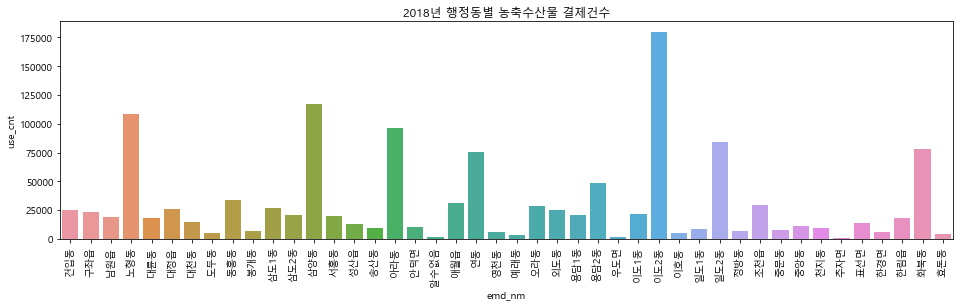

In [21]:
# 연도/행정동별 결제건수 비교
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2018_농축, x='emd_nm', y='use_cnt')
plt.title('2018년 행정동별 농축수산물 결제건수')
plt.xticks(rotation=90)
plt.show()

In [22]:
# plt.figure(figsize=(16, 4))
# sns.barplot(data=food_2019_농축, x='emd_nm', y='use_cnt')
# plt.title('2019년 행정동별 농축수산물 결제건수')
# plt.xticks(rotation=90)
# plt.show()

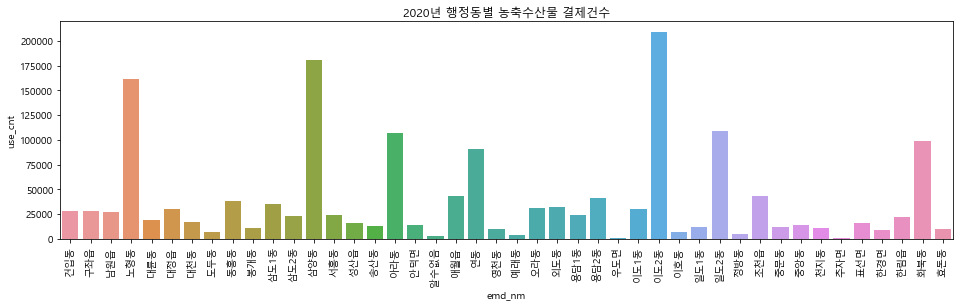

In [23]:
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2020_농축, x='emd_nm', y='use_cnt')
plt.title('2020년 행정동별 농축수산물 결제건수')
plt.xticks(rotation=90)
plt.show()

In [24]:
# plt.figure(figsize=(16, 4))
# sns.barplot(data=food_2021_농축, x='emd_nm', y='use_cnt')
# plt.title('2021년 행정동별 농축수산물 결제건수')
# plt.xticks(rotation=90)
# plt.show()

**많은 농축수산물 결제건수가 발생하는 행정동은 ['노형동', '삼양동', '이도2동']<br>
+) <span style="color:blue">코로나19 상황에도 불구하고 2020년의 결제건수가 가장 많음</span> → 해외여행 불가로 대신 제주도로?!<br>
++) <span style="color:red">2021년은 6개월 동안의 데이터만 있음에도 불구하고 2020년과 비슷한 양상</span>**

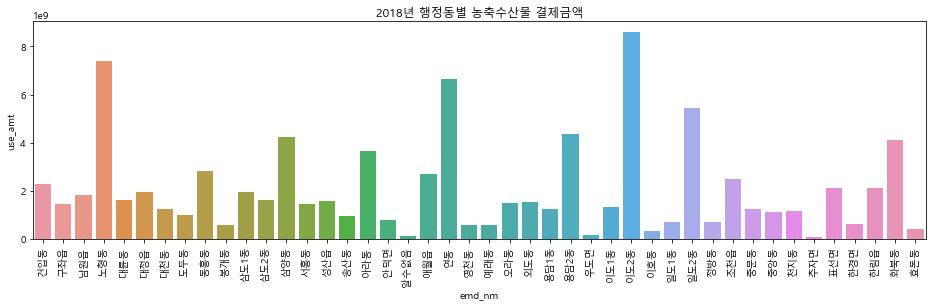

In [25]:
# 연도/행정동별 결제금액 비교
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2018_농축, x='emd_nm', y='use_amt')
plt.title('2018년 행정동별 농축수산물 결제금액')
plt.xticks(rotation=90)
plt.show()

In [26]:
# plt.figure(figsize=(16, 4))
# sns.barplot(data=food_2019_농축, x='emd_nm', y='use_amt')
# plt.title('2019년 행정동별 농축수산물 결제금액')
# plt.xticks(rotation=90)
# plt.show()

In [27]:
# plt.figure(figsize=(16, 4))
# sns.barplot(data=food_2020_농축, x='emd_nm', y='use_amt')
# plt.title('2020년 행정동별 농축수산물 결제금액')
# plt.xticks(rotation=90)
# plt.show()

In [28]:
# plt.figure(figsize=(16, 4))
# sns.barplot(data=food_2021_농축, x='emd_nm', y='use_amt')
# plt.title('2021년 행정동별 농축수산물 결제금액')
# plt.xticks(rotation=90)
# plt.show()

**결제금액 기준으로 보면 ['연동', '일도2동', '화북동']이 추가로 결제금액이 많은 지역으로 나타나고, 연도마다 큰 차이는 없음**

### **② 마트/슈퍼마켓**

In [29]:
# 마트/슈퍼마켓 소비
food_2018_마트 = food_2018[44:88].reset_index()
food_2019_마트 = food_2019[44:88].reset_index()
food_2020_마트 = food_2020[44:88].reset_index()
food_2021_마트 = food_2021[44:88].reset_index()

food_2019_마트.tail()

,mct_cat_nm,emd_nm,use_cnt,use_amt
39,마트/슈퍼마켓,표선면,134462,5131580320
40,마트/슈퍼마켓,한경면,95697,3661382980
41,마트/슈퍼마켓,한림읍,249593,9603000638
42,마트/슈퍼마켓,화북동,623857,16900617539
43,마트/슈퍼마켓,효돈동,103199,4688664450


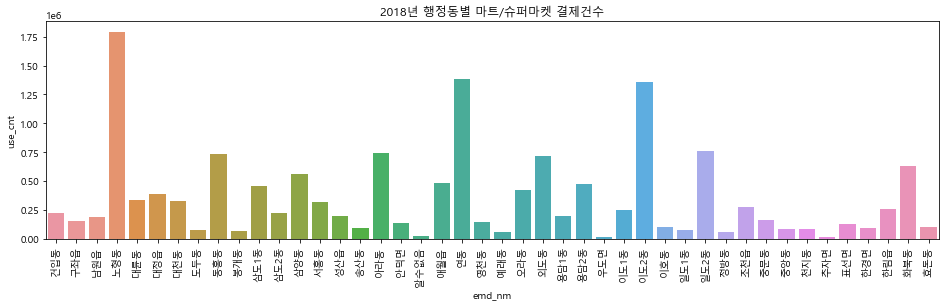

In [30]:
# 연도/행정동별 결제건수 비교
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2018_마트, x='emd_nm', y='use_cnt')
plt.title('2018년 행정동별 마트/슈퍼마켓 결제건수')
plt.xticks(rotation=90)
plt.show()

In [31]:
# plt.figure(figsize=(16, 4))
# sns.barplot(data=food_2019_마트, x='emd_nm', y='use_cnt')
# plt.title('2019년 행정동별 마트/슈퍼마켓 결제건수')
# plt.xticks(rotation=90)
# plt.show()

In [32]:
# plt.figure(figsize=(16, 4))
# sns.barplot(data=food_2020_마트, x='emd_nm', y='use_cnt')
# plt.title('2020년 행정동별 마트/슈퍼마켓 결제건수')
# plt.xticks(rotation=90)
# plt.show()

In [33]:
# plt.figure(figsize=(16, 4))
# sns.barplot(data=food_2021_마트, x='emd_nm', y='use_cnt')
# plt.title('2021년 행정동별 마트/슈퍼마켓 결제건수')
# plt.xticks(rotation=90)
# plt.show()

**많은 마트/슈퍼마켓 결제건수가 발생하는 행정동은 ['노형동', '연동', '이도2동']**

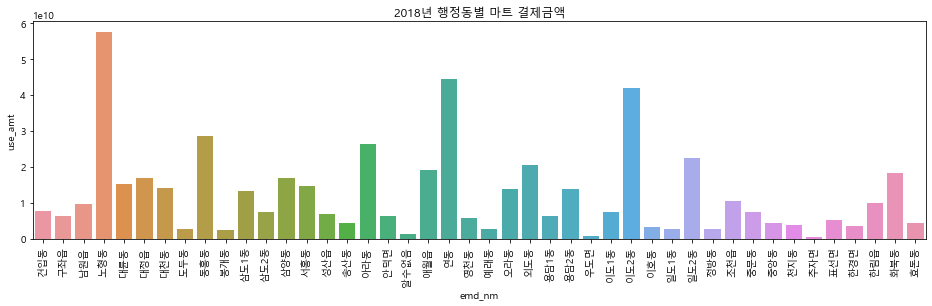

In [34]:
# 연도/행정동별 결제금액 비교
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2018_마트, x='emd_nm', y='use_amt')
plt.title('2018년 행정동별 마트 결제금액')
plt.xticks(rotation=90)
plt.show()

In [35]:
# plt.figure(figsize=(16, 4))
# sns.barplot(data=food_2019_마트, x='emd_nm', y='use_amt')
# plt.title('2019년 행정동별 마트 결제금액')
# plt.xticks(rotation=90)
# plt.show()

In [36]:
# plt.figure(figsize=(16, 4))
# sns.barplot(data=food_2020_마트, x='emd_nm', y='use_amt')
# plt.title('2020년 행정동별 마트 결제금액')
# plt.xticks(rotation=90)
# plt.show()

In [37]:
# plt.figure(figsize=(16, 4))
# sns.barplot(data=food_2021_마트, x='emd_nm', y='use_amt')
# plt.title('2021년 행정동별 마트 결제금액')
# plt.xticks(rotation=90)
# plt.show()

**결제건수와 마찬가지로 ['노형동', '연동', '이도2동']이 결제금액이 많은 지역으로 나타나고, 연도마다 큰 차이는 없음**

### **③ 배달**

In [38]:
# 배달 소비
food_2018_배달 = food_2018[88:132].reset_index()
food_2019_배달 = food_2019[88:132].reset_index()
food_2020_배달 = food_2020[88:132].reset_index()
food_2021_배달 = food_2021[88:132].reset_index()

food_2020_배달.tail()

,mct_cat_nm,emd_nm,use_cnt,use_amt
39,배달,표선면,17024,382618802
40,배달,한경면,6783,146881069
41,배달,한림읍,41423,943855026
42,배달,화북동,114937,2712294851
43,배달,효돈동,6069,126242832


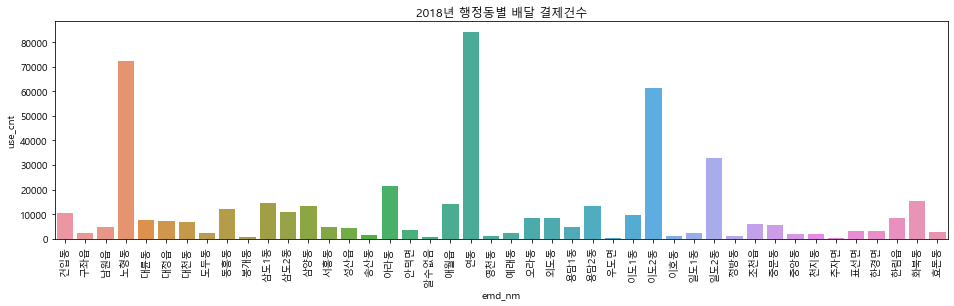

In [39]:
# 연도/행정동별 결제건수 비교
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2018_배달, x='emd_nm', y='use_cnt')
plt.title('2018년 행정동별 배달 결제건수')
plt.xticks(rotation=90)
plt.show()

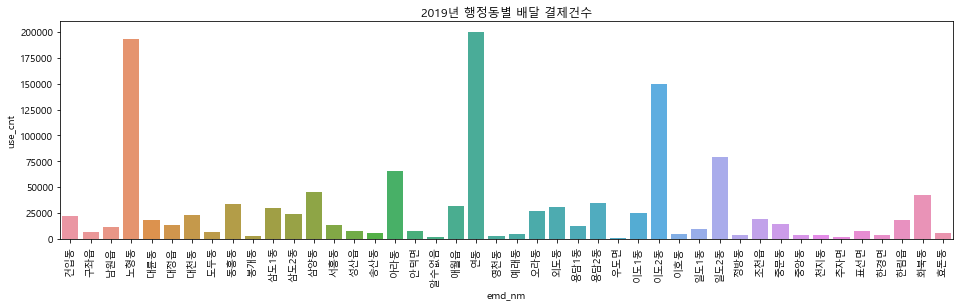

In [40]:
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2019_배달, x='emd_nm', y='use_cnt')
plt.title('2019년 행정동별 배달 결제건수')
plt.xticks(rotation=90)
plt.show()

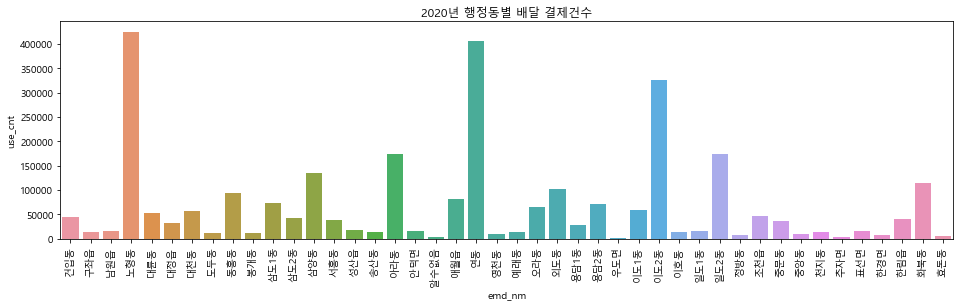

In [41]:
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2020_배달, x='emd_nm', y='use_cnt')
plt.title('2020년 행정동별 배달 결제건수')
plt.xticks(rotation=90)
plt.show()

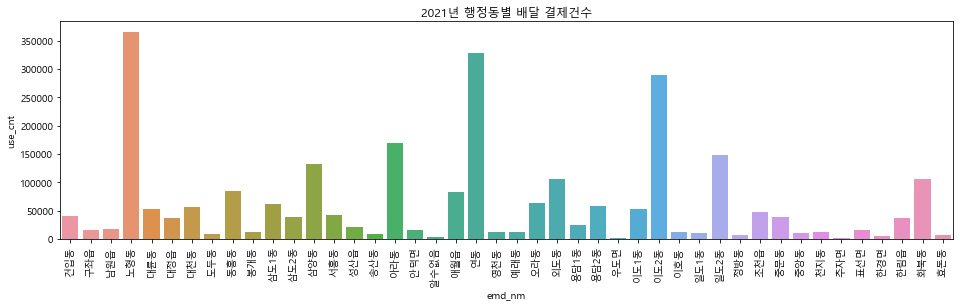

In [42]:
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2021_배달, x='emd_nm', y='use_cnt')
plt.title('2021년 행정동별 배달 결제건수')
plt.xticks(rotation=90)
plt.show()

**많은 배달 결제건수가 발생하는 행정동은 ['노형동', '연동', '이도2동']<br>
+) <span style="color:red">해를 거듭할수록 배달 결제건수가 급증</span> → <span style="color:orange">분석할 때 고려해야할 듯</span>**

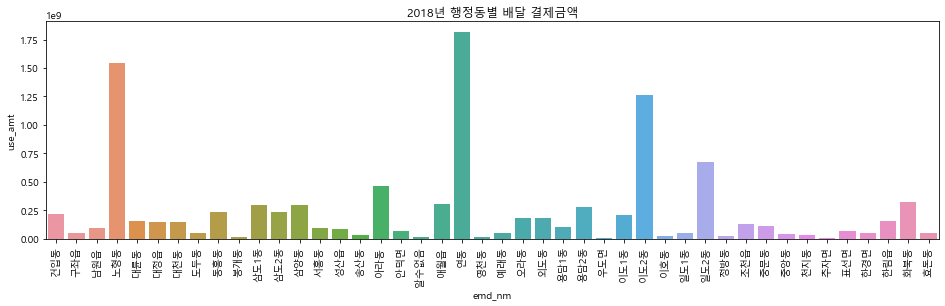

In [43]:
# 연도/행정동별 결제금액 비교
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2018_배달, x='emd_nm', y='use_amt')
plt.title('2018년 행정동별 배달 결제금액')
plt.xticks(rotation=90)
plt.show()

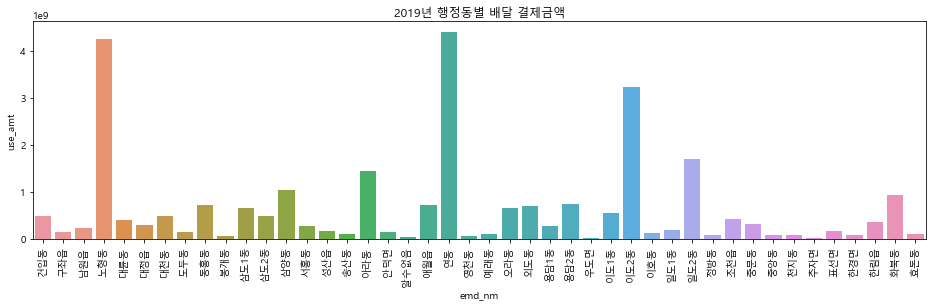

In [44]:
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2019_배달, x='emd_nm', y='use_amt')
plt.title('2019년 행정동별 배달 결제금액')
plt.xticks(rotation=90)
plt.show()

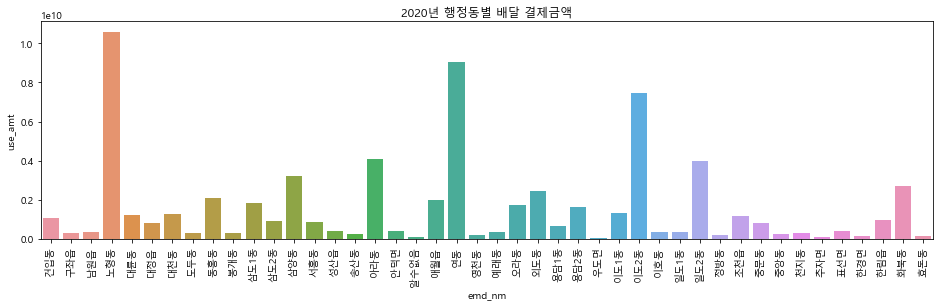

In [45]:
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2020_배달, x='emd_nm', y='use_amt')
plt.title('2020년 행정동별 배달 결제금액')
plt.xticks(rotation=90)
plt.show()

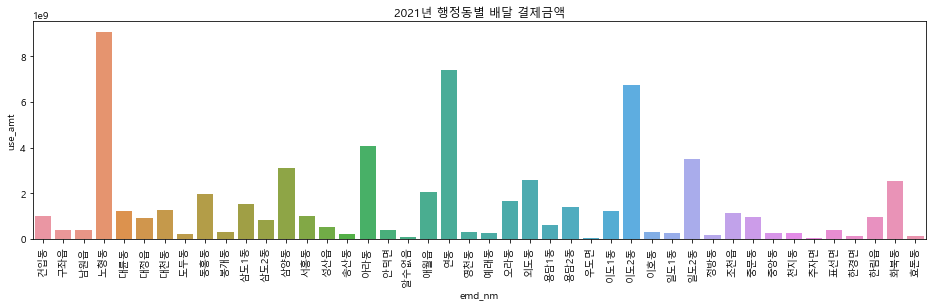

In [46]:
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2021_배달, x='emd_nm', y='use_amt')
plt.title('2021년 행정동별 배달 결제금액')
plt.xticks(rotation=90)
plt.show()

**결제건수와 마찬가지로 ['노형동', '연동', '이도2동']이 결제금액이 많은 지역으로 나타나고, <span style="color:red">연도마다 급증</span>**

### **④ 식품**

In [47]:
# 식품 소비
food_2018_식품 = food_2018[132:].reset_index()
food_2019_식품 = food_2019[132:].reset_index()
food_2020_식품 = food_2020[132:].reset_index()
food_2021_식품 = food_2021[132:].reset_index()

food_2021_식품.tail()

,mct_cat_nm,emd_nm,use_cnt,use_amt
39,식품,표선면,42746,1483662889
40,식품,한경면,33249,1196127164
41,식품,한림읍,86049,3829216319
42,식품,화북동,80326,3431403956
43,식품,효돈동,24983,724432165


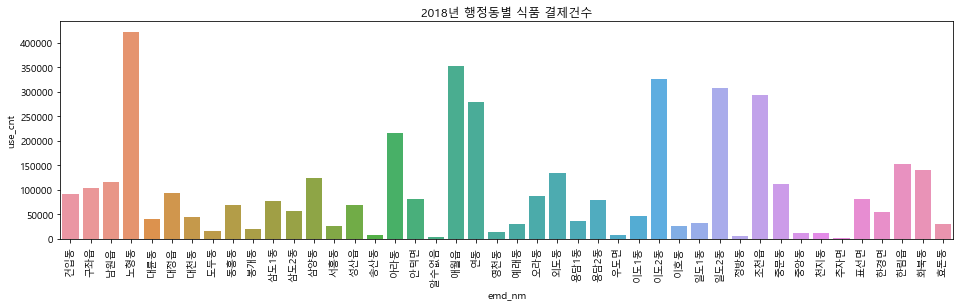

In [48]:
# 연도/행정동별 결제건수 비교
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2018_식품, x='emd_nm', y='use_cnt')
plt.title('2018년 행정동별 식품 결제건수')
plt.xticks(rotation=90)
plt.show()

In [49]:
# plt.figure(figsize=(16, 4))
# sns.barplot(data=food_2019_식품, x='emd_nm', y='use_cnt')
# plt.title('2019년 행정동별 식품 결제건수')
# plt.xticks(rotation=90)
# plt.show()

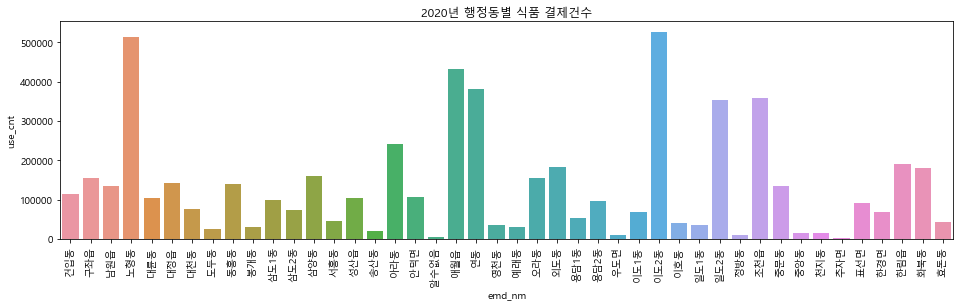

In [50]:
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2020_식품, x='emd_nm', y='use_cnt')
plt.title('2020년 행정동별 식품 결제건수')
plt.xticks(rotation=90)
plt.show()

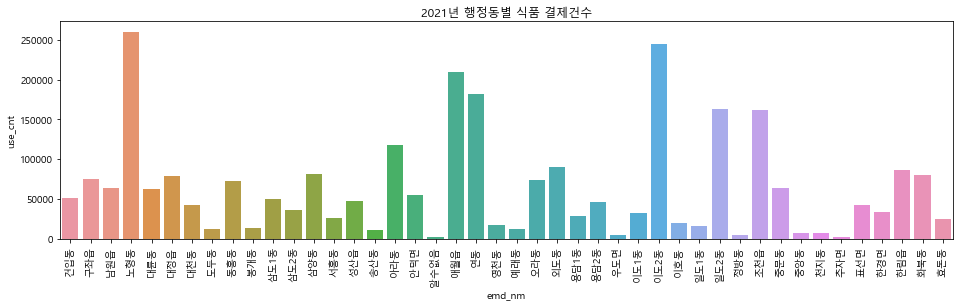

In [51]:
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2021_식품, x='emd_nm', y='use_cnt')
plt.title('2021년 행정동별 식품 결제건수')
plt.xticks(rotation=90)
plt.show()

**많은 식품 결제건수가 발생하는 행정동은 ['노형동', '애월읍', '연동', '이도2동']<br>
+) <span style="color:blue">2020년에 식품 결제건수가 어느 정도 증가했고, 이도2동의 경우 더욱 증가가 두드러짐</span>**

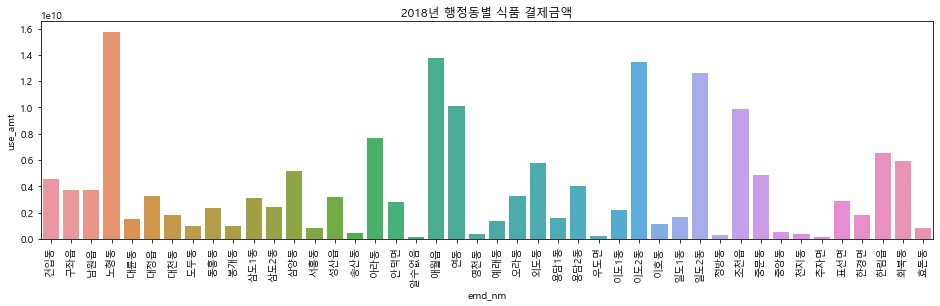

In [52]:
# 연도/행정동별 결제금액 비교
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2018_식품, x='emd_nm', y='use_amt')
plt.title('2018년 행정동별 식품 결제금액')
plt.xticks(rotation=90)
plt.show()

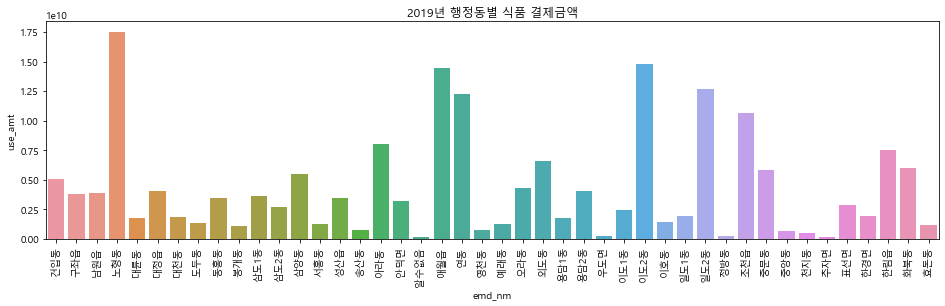

In [53]:
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2019_식품, x='emd_nm', y='use_amt')
plt.title('2019년 행정동별 식품 결제금액')
plt.xticks(rotation=90)
plt.show()

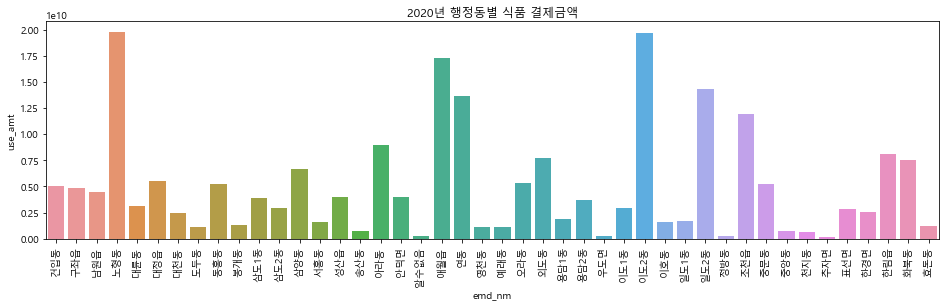

In [54]:
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2020_식품, x='emd_nm', y='use_amt')
plt.title('2020년 행정동별 식품 결제금액')
plt.xticks(rotation=90)
plt.show()

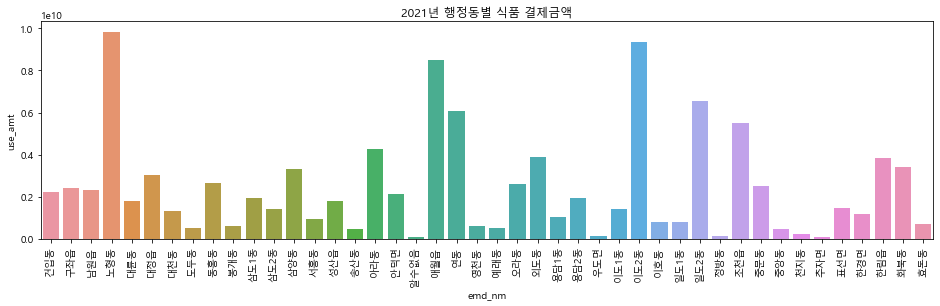

In [55]:
plt.figure(figsize=(16, 4))
sns.barplot(data=food_2021_식품, x='emd_nm', y='use_amt')
plt.title('2021년 행정동별 식품 결제금액')
plt.xticks(rotation=90)
plt.show()

**결제금액이 많은 지역은 ['노형동', '애월읍', '연동', '이도2동'], <span style="color:red">연도마다 조금씩 증가</span><br>
+) <span style="color:green">2021년은 2020년과 비슷한 양상</span>**

## **거주인구 데이터와 통합**

In [56]:
pop_2018_dong = pd.read_csv('2018년 행정동별 거주인구.csv')
pop_2019_dong = pd.read_csv('2019년 행정동별 거주인구.csv')
pop_2020_dong = pd.read_csv('2020년 행정동별 거주인구.csv')
pop_2021_dong = pd.read_csv('2021년 행정동별 거주인구.csv')

pop_2018_dong.tail()

,emd_nm,resid_reg_pop,foreign_pop,total_pop
38,표선면,12340.166667,420.750000,12760.916667
39,한경면,9047.083333,337.500000,9384.583333
40,한림읍,21113.250000,3634.500000,24747.750000
41,화북동,25047.500000,382.166667,25429.666667
42,효돈동,5316.083333,82.833333,5398.916667


In [57]:
# 행정동별 거주인구 데이터에는 '알수없음'이 없으므로 DataFrame 통합을 위해서 제거
food_2018_농축_pop = food_2018_농축[food_2018_농축['emd_nm']!='알수없음'].reset_index().drop('index', axis=1)

food_2018_농축_pop.tail()

,mct_cat_nm,emd_nm,use_cnt,use_amt
38,농축수산물,표선면,13531,2130352875
39,농축수산물,한경면,6060,635625965
40,농축수산물,한림읍,18000,2121137722
41,농축수산물,화북동,78000,4097640697
42,농축수산물,효돈동,4434,394512547


In [58]:
# Merge 농축수산물 DataFrame
농축_2018 = pd.merge(food_2018_농축, pop_2018_dong, how='inner')
농축_2019 = pd.merge(food_2019_농축, pop_2019_dong, how='inner')
농축_2020 = pd.merge(food_2020_농축, pop_2020_dong, how='inner')
농축_2021 = pd.merge(food_2021_농축, pop_2021_dong, how='inner')

농축_2018

,mct_cat_nm,emd_nm,use_cnt,use_amt,resid_reg_pop,foreign_pop,total_pop
0,농축수산물,건입동,24604,2299389020,9749.750000,243.416667,9993.166667
1,농축수산물,구좌읍,23102,1438780972,15647.916667,585.416667,16233.333333
2,농축수산물,남원읍,18629,1836648037,19156.750000,680.833333,19837.583333
3,농축수산물,노형동,108442,7384786702,53596.333333,1950.000000,55546.333333
4,농축수산물,대륜동,18330,1628893752,13777.166667,187.500000,13964.666667
5,농축수산물,대정읍,26015,1948735809,21290.583333,1600.500000,22891.083333
6,농축수산물,대천동,14906,1238548288,13445.250000,245.833333,13691.083333
7,농축수산물,도두동,4800,1006448371,3060.750000,124.333333,3185.083333
8,농축수산물,동홍동,33330,2818955193,22779.583333,1258.166667,24037.750000
9,농축수산물,봉개동,6575,555950587,4086.750000,81.583333,4168.333333


In [59]:
# Merge 마트/슈퍼마켓 DataFrame
마트_2018 = pd.merge(food_2018_마트, pop_2018_dong, how='inner')
마트_2019 = pd.merge(food_2019_마트, pop_2019_dong, how='inner')
마트_2020 = pd.merge(food_2020_마트, pop_2020_dong, how='inner')
마트_2021 = pd.merge(food_2021_마트, pop_2021_dong, how='inner')

In [60]:
# Merge 배달 DataFrame
배달_2018 = pd.merge(food_2018_배달, pop_2018_dong, how='inner')
배달_2019 = pd.merge(food_2019_배달, pop_2019_dong, how='inner')
배달_2020 = pd.merge(food_2020_배달, pop_2020_dong, how='inner')
배달_2021 = pd.merge(food_2021_배달, pop_2021_dong, how='inner')

In [61]:
# Merge 식품 DataFrame
식품_2018 = pd.merge(food_2018_식품, pop_2018_dong, how='inner')
식품_2019 = pd.merge(food_2019_식품, pop_2019_dong, how='inner')
식품_2020 = pd.merge(food_2020_식품, pop_2020_dong, how='inner')
식품_2021 = pd.merge(food_2021_식품, pop_2021_dong, how='inner')

In [62]:
농축_2018.corr()

,use_cnt,use_amt,resid_reg_pop,foreign_pop,total_pop
use_cnt,1.000000,0.924262,0.842491,0.237590,0.830369
use_amt,0.924262,1.000000,0.913197,0.378257,0.906372
resid_reg_pop,0.842491,0.913197,1.000000,0.538511,0.999028
foreign_pop,0.237590,0.378257,0.538511,1.000000,0.575127
total_pop,0.830369,0.906372,0.999028,0.575127,1.000000


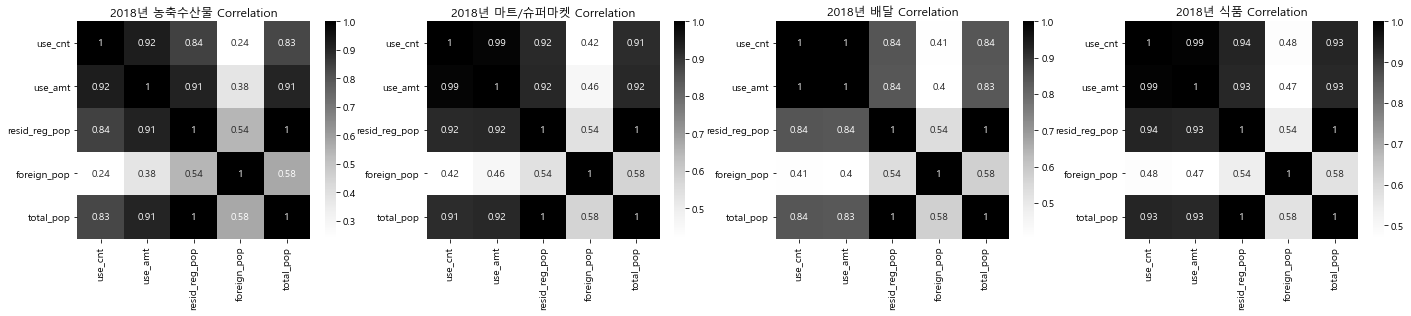

In [63]:
# 2018년 업종별 Correlation
plt.figure(figsize=(24, 4))

plt.subplot(141)
sns.heatmap(농축_2018.corr(), annot=True, cmap='Greys')
plt.title('2018년 농축수산물 Correlation')

plt.subplot(142)
sns.heatmap(마트_2018.corr(), annot=True, cmap='Greys')
plt.title('2018년 마트/슈퍼마켓 Correlation')

plt.subplot(143)
sns.heatmap(배달_2018.corr(), annot=True, cmap='Greys')
plt.title('2018년 배달 Correlation')

plt.subplot(144)
sns.heatmap(식품_2018.corr(), annot=True, cmap='Greys')
plt.title('2018년 식품 Correlation')

plt.show()

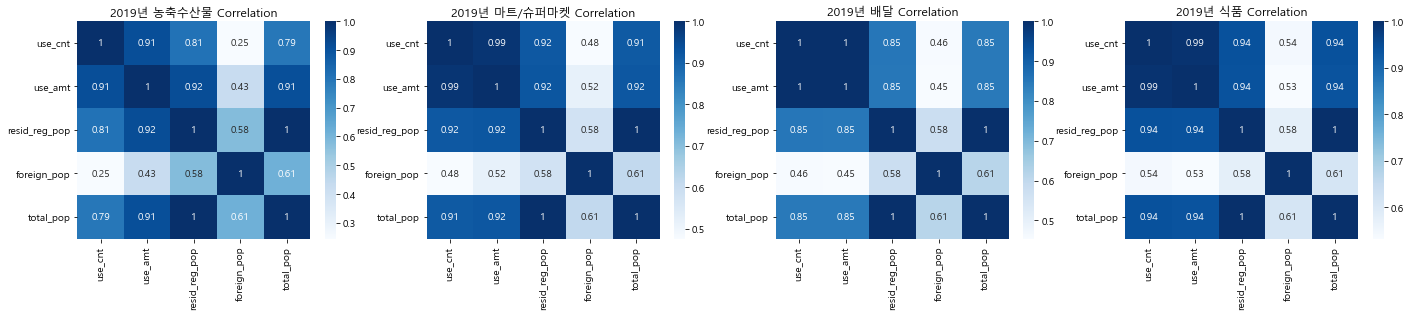

In [64]:
# 2019년 업종별 Correlation
plt.figure(figsize=(24, 4))

plt.subplot(141)
sns.heatmap(농축_2019.corr(), annot=True, cmap='Blues')
plt.title('2019년 농축수산물 Correlation')

plt.subplot(142)
sns.heatmap(마트_2019.corr(), annot=True, cmap='Blues')
plt.title('2019년 마트/슈퍼마켓 Correlation')

plt.subplot(143)
sns.heatmap(배달_2019.corr(), annot=True, cmap='Blues')
plt.title('2019년 배달 Correlation')

plt.subplot(144)
sns.heatmap(식품_2019.corr(), annot=True, cmap='Blues')
plt.title('2019년 식품 Correlation')

plt.show()

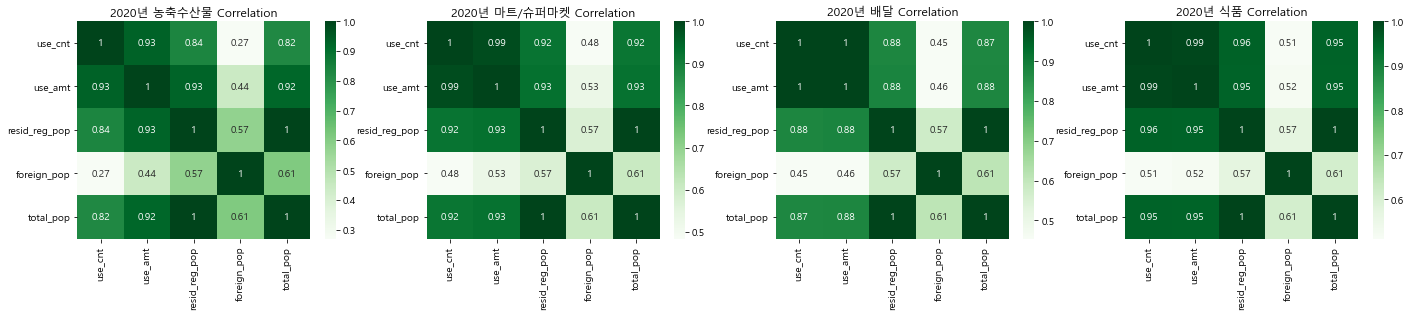

In [65]:
# 2020년 업종별 Correlation
plt.figure(figsize=(24, 4))

plt.subplot(141)
sns.heatmap(농축_2020.corr(), annot=True, cmap='Greens')
plt.title('2020년 농축수산물 Correlation')

plt.subplot(142)
sns.heatmap(마트_2020.corr(), annot=True, cmap='Greens')
plt.title('2020년 마트/슈퍼마켓 Correlation')

plt.subplot(143)
sns.heatmap(배달_2020.corr(), annot=True, cmap='Greens')
plt.title('2020년 배달 Correlation')

plt.subplot(144)
sns.heatmap(식품_2020.corr(), annot=True, cmap='Greens')
plt.title('2020년 식품 Correlation')

plt.show()

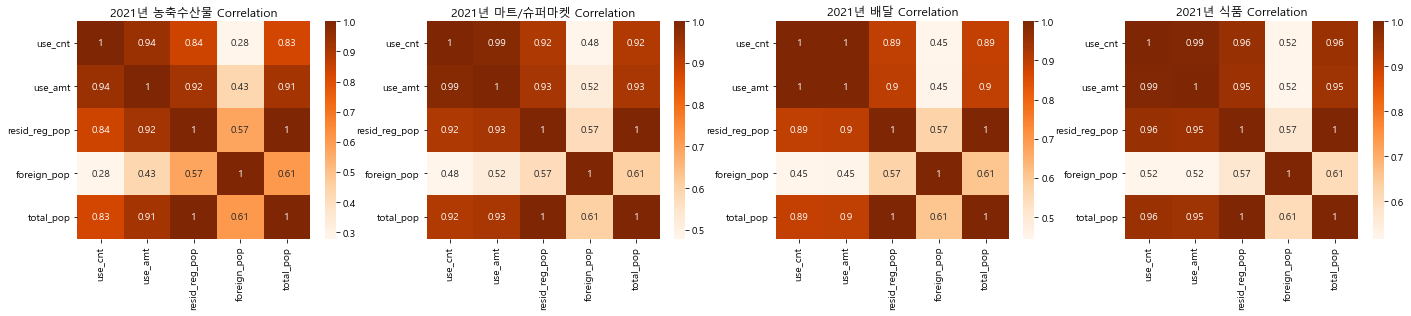

In [66]:
# 2021년 업종별 Correlation
plt.figure(figsize=(24, 4))

plt.subplot(141)
sns.heatmap(농축_2021.corr(), annot=True, cmap='Oranges')
plt.title('2021년 농축수산물 Correlation')

plt.subplot(142)
sns.heatmap(마트_2021.corr(), annot=True, cmap='Oranges')
plt.title('2021년 마트/슈퍼마켓 Correlation')

plt.subplot(143)
sns.heatmap(배달_2021.corr(), annot=True, cmap='Oranges')
plt.title('2021년 배달 Correlation')

plt.subplot(144)
sns.heatmap(식품_2021.corr(), annot=True, cmap='Oranges')
plt.title('2021년 식품 Correlation')

plt.show()